In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('C:/Users/SONY/Machine_Learning_Project/Processed_Data/gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [4]:
df.head()

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,emaar palm gardens,flat,1.75,9210.0,Super Built up area 1900(176.52 sq.m.)Built Up...,1900.0,3,3,3,6.0,West,Relatively New,V69525180,sector 83,1900.0,1600.0,1240.0,0,1,0,0,0,2,150
1,eros wembley estate,flat,1.40,10174.0,Super Built up area 1376(127.83 sq.m.),1376.0,3,3,2,9.0,East,Relatively New,K69325724,sector 50,1376.0,NaN,NaN,0,0,1,0,0,2,117
2,ss the leaf,flat,2.13,7574.0,Super Built up area 2812(261.24 sq.m.)Built Up...,2812.0,4,4,3,6.0,North,Relatively New,K70087544,sector 85,2812.0,2600.0,2400.0,0,0,0,0,0,0,49
3,international city by sobha phase 2,house,6.25,10035.0,Plot area 692(578.6 sq.m.),6228.0,5,7,3+,3.0,North-East,Relatively New,NaN,sector 109,NaN,6228.0,NaN,1,1,1,1,0,0,147
4,ss the coralwood,flat,1.10,4857.0,Super Built up area 1750(162.58 sq.m.),2265.0,3,3,2,9.0,North,Relatively New,H66415758,sector 84,1750.0,NaN,NaN,0,0,0,0,0,0,75


In [5]:
df.shape

(3377, 24)

In [6]:
df.columns

Index(['society', 'property_type', 'price', 'price_per_sqft', 'areaWithType',
       'area', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'property_id', 'sector', 'super_built_up_area',
       'built_up_area', 'carpet_area', 'study room', 'servant room',
       'store room', 'pooja room', 'others', 'furnishing_type',
       'luxury_score'],
      dtype='object')

C:\Users\SONY\AppData\Local\Temp\ipykernel_6420\2797181776.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

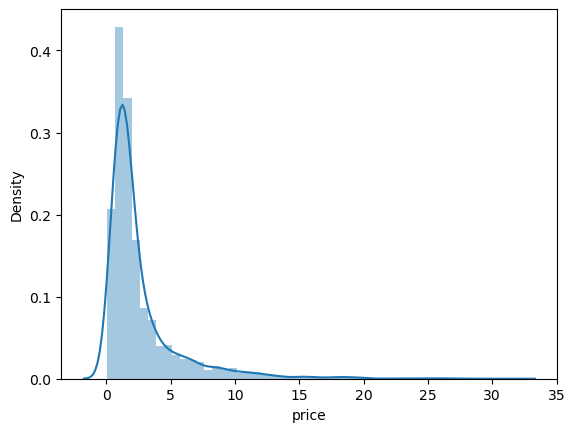

In [7]:
# outliers on the basis of price column
sns.distplot(df['price'])

<Axes: xlabel='price'>

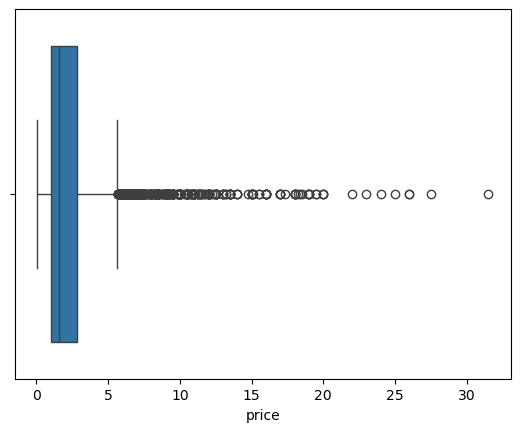

In [9]:
sns.boxplot(x=df['price'])

In [10]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(376,
 count    376.000000
 mean       9.705559
 std        4.125436
 min        5.700000
 25%        6.750000
 50%        8.500000
 75%       11.000000
 max       31.500000
 Name: price, dtype: float64)

In [11]:
outliers.sort_values('price',ascending=False).head(20)

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2008,arjun marg/ sector- 26 phase- 1/ golf course road,house,31.50,35000.0,Plot area 1000(836.13 sq.m.),9000.0,7,9,3+,3.0,North-East,Moderately Old,NaN,sector 26,NaN,9000.0,NaN,1,1,1,1,0,1,74
2658,independent,house,27.50,24366.0,Plot area 1254(1048.5 sq.m.),11286.0,6,7,3+,3.0,North-East,Relatively New,NaN,sector 43,NaN,11286.0,NaN,1,1,0,1,1,2,42
10,independent,house,26.00,82540.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,3150.0,16,16,3+,4.0,North-West,New Property,NaN,sector 26,NaN,400.0,350.0,1,1,1,1,0,2,72
2106,dlf city plots,house,26.00,57206.0,Plot area 505(422.24 sq.m.),4545.0,6,7,3+,2.0,North-East,New Property,NaN,sector 26,NaN,4545.0,NaN,1,1,0,1,1,2,138
593,suncity township,house,25.00,31111.0,Plot area 1000(836.13 sq.m.),8036.0,4,4,3+,2.0,North,Moderately Old,NaN,sector 54,NaN,1000.0,NaN,1,1,1,1,0,0,0
3034,emaar the palm springs,house,24.00,600000.0,Plot area 400(37.16 sq.m.),400.0,5,5,2,1.0,North-East,Old Property,NaN,sector 54,NaN,400.0,NaN,1,1,0,1,0,2,122
1961,independent,house,23.00,25556.0,Plot area 1000(836.13 sq.m.),9000.0,4,4,3+,2.0,South-West,Relatively New,NaN,sector 26,NaN,9000.0,NaN,1,1,1,1,0,2,145
1517,vipul tatvam villa,house,22.00,26667.0,Plot area 1000(836.13 sq.m.),8250.0,5,6,3,3.0,NaN,Moderately Old,NaN,sector 48,NaN,1000.0,NaN,0,1,0,0,0,0,54
2860,dlf city plots,house,20.00,44265.0,Plot area 502(419.74 sq.m.),4518.0,16,20,3+,4.0,North-East,New Property,NaN,sector 26,NaN,4518.0,NaN,1,1,1,1,0,2,153
1892,luxury dlf city floors,house,20.00,48889.0,Plot area 500(418.06 sq.m.),4091.0,16,16,3+,4.0,NaN,New Property,NaN,sector 26,NaN,500.0,NaN,0,1,0,0,0,2,31


In [12]:
# on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

### Price_per_sqft

C:\Users\SONY\AppData\Local\Temp\ipykernel_6420\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

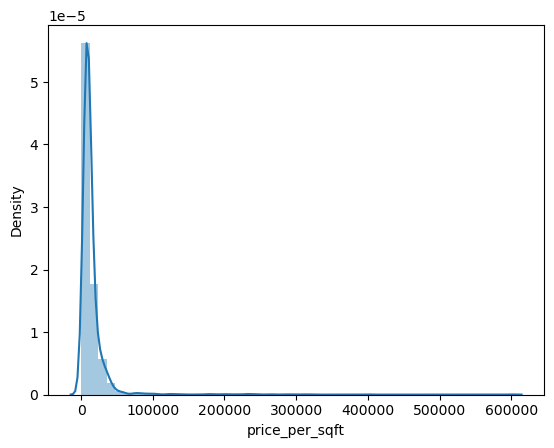

In [13]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

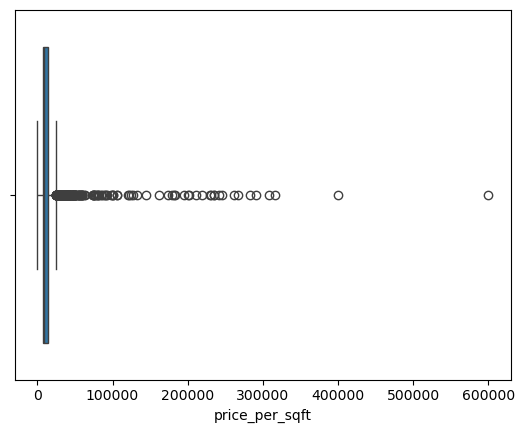

In [14]:
sns.boxplot(x=df['price_per_sqft'])

In [15]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(347,
 count       347.000000
 mean      54722.158501
 std       61927.240792
 min       24926.000000
 25%       29048.000000
 50%       34568.000000
 75%       44354.500000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [16]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\SONY\AppData\Local\Temp\ipykernel_6420\205471443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [17]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

C:\Users\SONY\AppData\Local\Temp\ipykernel_6420\3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [18]:
outliers_sqft['price_per_sqft'].describe()

count      347.000000
mean     29336.858790
std      12607.306163
min       2778.000000
25%      25926.000000
50%      30180.000000
75%      35926.000000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [19]:
df.update(outliers_sqft)

C:\Users\SONY\AppData\Local\Temp\ipykernel_6420\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

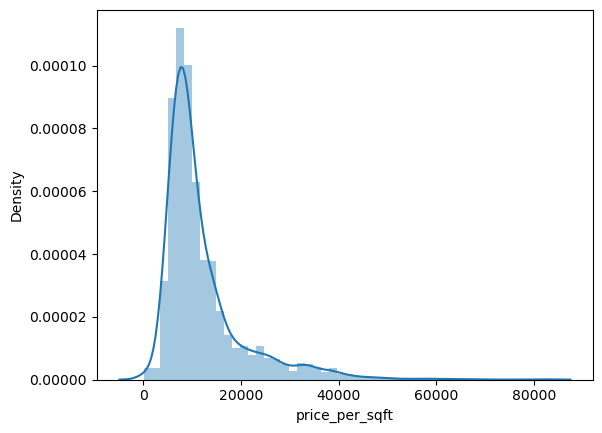

In [20]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

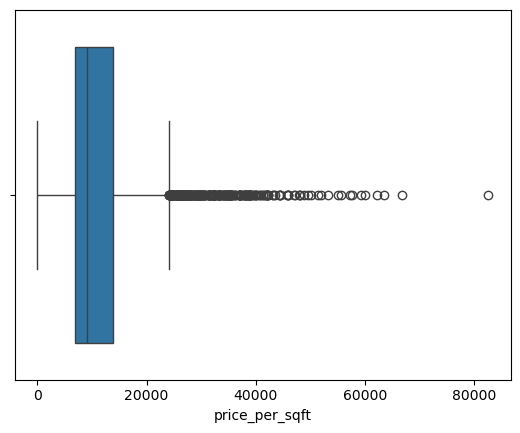

In [21]:
sns.boxplot(x=df['price_per_sqft'])

In [22]:
df[df['price_per_sqft']>50000]

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
10,independent,house,26.00,82540.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,3150.0,16,16,3+,4.0,North-West,New Property,NaN,sector 26,NaN,400.0,350.0,1,1,1,1,0,2,72
47,emaar the palm springs,house,14.00,62222.0,Plot area 250(209.03 sq.m.),2250.0,4,5,3+,2.0,North,Old Property,NaN,sector 54,NaN,2250.0,NaN,1,1,0,0,0,2,160
509,nul,house,12.50,51440.0,Plot area 270(225.75 sq.m.),2430.0,16,17,3+,4.0,South,Relatively New,NaN,sector 28,NaN,2430.0,NaN,1,1,0,1,1,1,137
798,cloudnine cottages,house,5.50,55000.0,Plot area 1000(92.9 sq.m.),1000.0,3,3,0,1.0,NaN,Moderately Old,NaN,sector 47,NaN,1000.0,NaN,0,0,0,0,0,0,0
1069,unitech escape,house,10.80,60000.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,1800.0,4,4,3,2.0,North,Relatively New,NaN,sector 50,NaN,250.0,200.0,1,1,1,1,0,2,103
1175,malibu towne,house,8.50,53125.0,Built Up area: 1600 (148.64 sq.m.),1600.0,12,12,3+,4.0,North,New Property,NaN,sector 47,NaN,1600.0,NaN,0,0,0,0,0,2,99
2064,unitech vistas,flat,9.00,57508.0,Built Up area: 1565 (145.39 sq.m.),1565.0,3,3,0,7.0,NaN,Undefined,X68863898,sector 70,NaN,1565.0,NaN,0,0,0,0,0,0,0
2106,dlf city plots,house,26.00,57206.0,Plot area 505(422.24 sq.m.),4545.0,6,7,3+,2.0,North-East,New Property,NaN,sector 26,NaN,4545.0,NaN,1,1,0,1,1,2,138
2510,emaar mgf marbella,house,18.00,55556.0,Plot area 360(301.01 sq.m.),3240.0,4,4,3+,3.0,East,Moderately Old,NaN,sector 66,NaN,3240.0,NaN,1,1,0,1,0,1,75
2547,independent,house,14.75,51864.0,Plot area 316(264.22 sq.m.),2844.0,16,20,3+,4.0,East,New Property,NaN,sector 26,NaN,2844.0,NaN,1,1,1,1,0,2,153


In [23]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

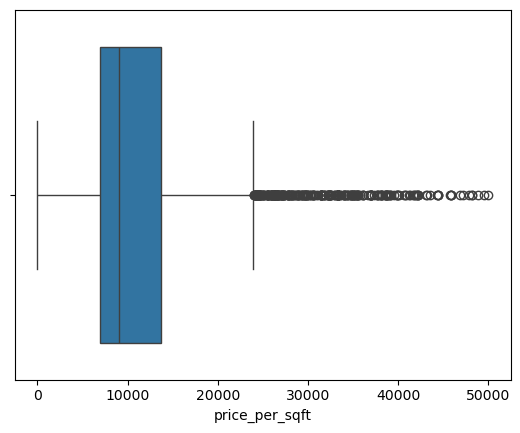

In [24]:
sns.boxplot(x=df['price_per_sqft'])

### Area

C:\Users\SONY\AppData\Local\Temp\ipykernel_6420\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

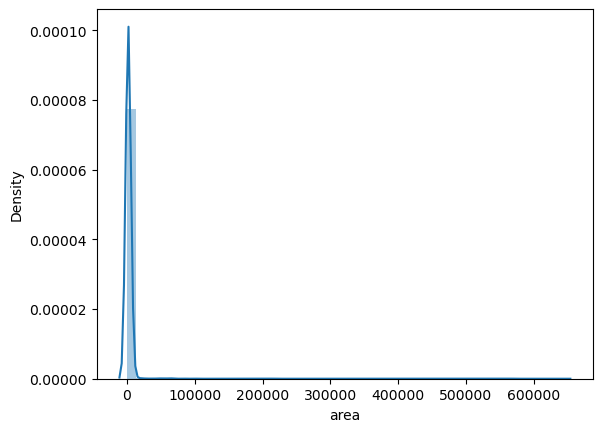

In [25]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

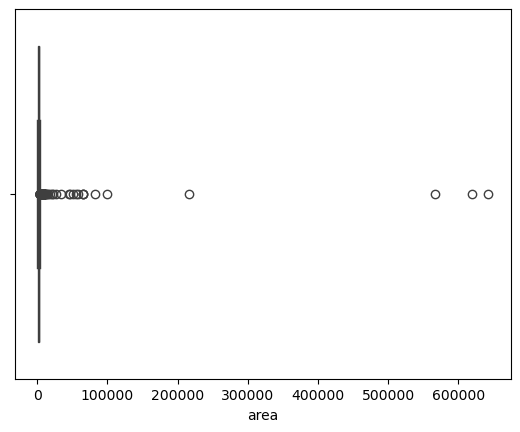

In [26]:
sns.boxplot(x=df['area'])

In [27]:
df['area'].describe()

count      3347.000000
mean       2821.928294
std       18961.107111
min         145.000000
25%        1309.000000
50%        1791.000000
75%        2361.000000
max      642857.000000
Name: area, dtype: float64

In [28]:
df[df['area'] > 100000]

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2020,signature global solera 2,flat,0.51,9.0,Carpet area: 514396 (47788.95 sq.m.),566667.0,2,2,1,3.0,North,New Property,B70122778,sector 107,NaN,NaN,514396.0,0,0,0,0,0,0,44
2729,independent,house,5.00,232.0,Plot area 2(1011.71 sq.m.),215517.0,6,5,3+,2.0,NaN,New Property,NaN,sector 50,NaN,2.0,NaN,1,1,0,1,1,2,0
3108,ramsons kshitij,flat,0.31,5.0,Carpet area: 607936 (56479.1 sq.m.),620000.0,2,2,1,1.0,North-East,Relatively New,D70174086,sector 95,NaN,NaN,607936.0,1,0,0,0,1,0,65
3289,signature the roselia,flat,0.45,7.0,Carpet area: 569243 (52884.41 sq.m.),642857.0,2,2,2,2.0,South-West,New Property,Y68589358,sector 95a,NaN,NaN,569243.0,0,0,0,0,0,0,76


In [29]:
df = df[df['area'] < 100000]

C:\Users\SONY\AppData\Local\Temp\ipykernel_6420\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

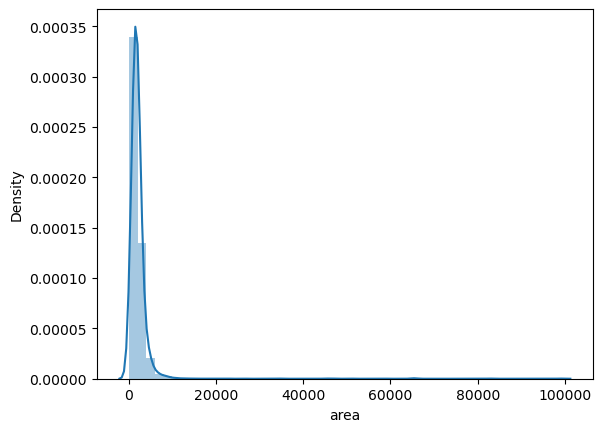

In [30]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

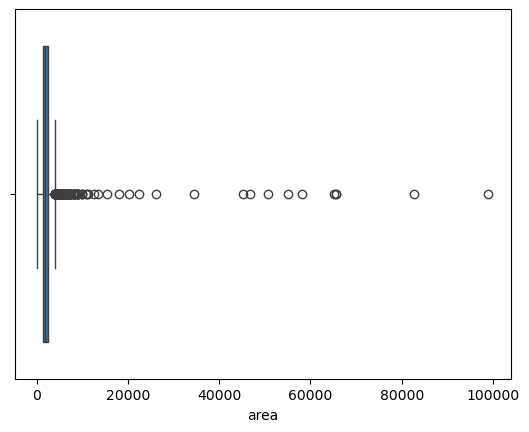

In [31]:
sns.boxplot(x=df['area'])

In [32]:
df[df['area'] > 10000].sort_values('area',ascending=False)
# [2005,2252,1415,215,210,2094,345,2128]

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2005,independent,house,18.40,1859.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,98978.0,6,8,3+,4.0,South,Relatively New,NaN,sector 26,NaN,NaN,11000.00,0,1,1,1,0,2,60
90,ganpati heights apartment,house,1.25,151.0,Plot area 115(7692.86 sq.m.),82781.0,10,6,2,3.0,South-East,Old Property,NaN,sector 13,NaN,115.0,NaN,0,0,0,0,1,0,7
2252,rof ananda,flat,0.38,58.0,Carpet area: 64529 (5994.94 sq.m.),65517.0,2,2,2,10.0,East,New Property,U69464558,sector 95,NaN,NaN,64529.00,1,0,0,0,0,0,15
1415,rof ananda,flat,0.38,58.0,Carpet area: 64412 (5984.07 sq.m.),65517.0,3,2,1,12.0,North,Relatively New,C70172232,sector 95,NaN,NaN,64412.00,0,0,0,0,0,0,51
2468,dlf city plot phase 4,house,13.00,1992.0,Carpet area: 7250 (6061.92 sq.m.),65261.0,10,10,3+,1.0,NaN,Undefined,NaN,sector 28,NaN,NaN,7250.00,0,0,0,0,0,0,0
215,pyramid elite,flat,0.46,79.0,Carpet area: 58141 (5401.48 sq.m.),58228.0,2,2,1,0.0,NaN,Under Construction,M68651514,sector 86,NaN,NaN,58141.00,0,0,0,0,0,0,15
210,rof ananda,flat,0.33,60.0,Carpet area: 54917 (5101.96 sq.m.),55000.0,2,2,1,13.0,South-West,Relatively New,N70172062,sector 95,NaN,NaN,54917.00,0,0,0,0,0,0,37
3398,independent,house,5.50,1087.0,Plot area 5620(4699.04 sq.m.)Built Up area: 82...,50598.0,8,8,2,3.0,North-East,Relatively New,NaN,sector 50,NaN,8260.0,4860.00,0,0,0,1,0,2,49
2073,independent,house,7.30,1560.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,46795.0,9,9,2,3.0,North-West,Relatively New,NaN,sector 25,NaN,5800.0,5200.00,0,1,1,0,0,2,109
2094,ramsons kshitij,flat,0.24,53.0,Carpet area: 45966 (4270.38 sq.m.),45283.0,2,2,1,10.0,North-West,Relatively New,F70174220,sector 95,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [34]:
df[df['area'] > 20000].sort_values('area',ascending=False)

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2005,independent,house,18.40,1859.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,98978.0,6,8,3+,4.0,South,Relatively New,NaN,sector 26,NaN,NaN,11000.0,0,1,1,1,0,2,60
90,ganpati heights apartment,house,1.25,151.0,Plot area 115(7692.86 sq.m.),82781.0,10,6,2,3.0,South-East,Old Property,NaN,sector 13,NaN,115.0,NaN,0,0,0,0,1,0,7
1415,rof ananda,flat,0.38,58.0,Carpet area: 64412 (5984.07 sq.m.),65517.0,3,2,1,12.0,North,Relatively New,C70172232,sector 95,NaN,NaN,64412.0,0,0,0,0,0,0,51
2252,rof ananda,flat,0.38,58.0,Carpet area: 64529 (5994.94 sq.m.),65517.0,2,2,2,10.0,East,New Property,U69464558,sector 95,NaN,NaN,64529.0,1,0,0,0,0,0,15
2468,dlf city plot phase 4,house,13.00,1992.0,Carpet area: 7250 (6061.92 sq.m.),65261.0,10,10,3+,1.0,NaN,Undefined,NaN,sector 28,NaN,NaN,7250.0,0,0,0,0,0,0,0
215,pyramid elite,flat,0.46,79.0,Carpet area: 58141 (5401.48 sq.m.),58228.0,2,2,1,0.0,NaN,Under Construction,M68651514,sector 86,NaN,NaN,58141.0,0,0,0,0,0,0,15
210,rof ananda,flat,0.33,60.0,Carpet area: 54917 (5101.96 sq.m.),55000.0,2,2,1,13.0,South-West,Relatively New,N70172062,sector 95,NaN,NaN,54917.0,0,0,0,0,0,0,37
3398,independent,house,5.50,1087.0,Plot area 5620(4699.04 sq.m.)Built Up area: 82...,50598.0,8,8,2,3.0,North-East,Relatively New,NaN,sector 50,NaN,8260.0,4860.0,0,0,0,1,0,2,49
2073,independent,house,7.30,1560.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,46795.0,9,9,2,3.0,North-West,Relatively New,NaN,sector 25,NaN,5800.0,5200.0,0,1,1,0,0,2,109
2094,ramsons kshitij,flat,0.24,53.0,Carpet area: 45966 (4270.38 sq.m.),45283.0,2,2,1,10.0,North-West,Relatively New,F70174220,sector 95,NaN,NaN,45966.0,0,0,0,0,1,0,33


In [35]:
df.drop(index=[2005,90,2252,1415,215,210,2094,345,2128,3398,21],inplace=True)

In [36]:
df[df['area'] > 20000].sort_values('area',ascending=False)

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2468,dlf city plot phase 4,house,13.00,1992.0,Carpet area: 7250 (6061.92 sq.m.),65261.0,10,10,3+,1.0,NaN,Undefined,NaN,sector 28,NaN,NaN,7250.0,0,0,0,0,0,0,0
2073,independent,house,7.30,1560.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,46795.0,9,9,2,3.0,North-West,Relatively New,NaN,sector 25,NaN,5800.0,5200.0,0,1,1,0,0,2,109
3370,independent,house,6.25,2778.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,22498.0,9,9,3+,3.0,North-East,New Property,NaN,sector 57,NaN,2660.0,2500.0,0,1,0,0,0,2,61
108,independent,house,5.50,2716.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,20250.0,8,7,3+,3.0,East,Moderately Old,NaN,sector 43,NaN,2850.0,2250.0,1,1,0,1,1,2,123


In [37]:
df.loc[2468,'area'] = 7250
df.loc[2073	,'area'] = 5800
df.loc[3370,'area'] = 2660

df.loc[108,'area'] = 2850
df.loc[3381,'area'] = 1812
df.loc[2214,'area'] = 2160
df.loc[2053,'area'] = 1175

C:\Users\SONY\AppData\Local\Temp\ipykernel_6420\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

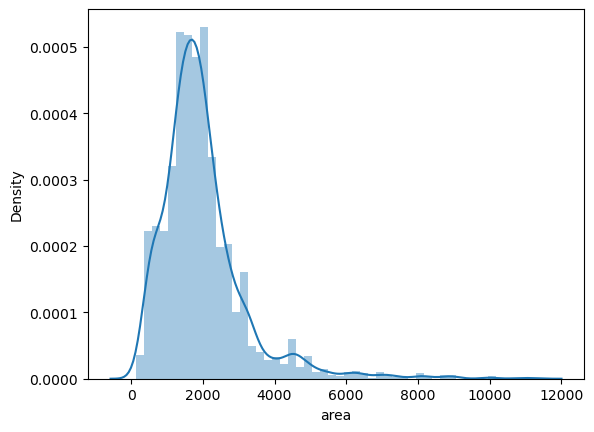

In [38]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

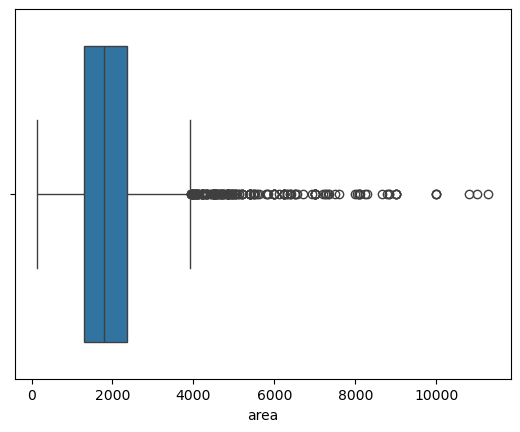

In [39]:
sns.boxplot(x=df['area'])

In [40]:
df['area'].describe()

count     3332.000000
mean      1988.820828
std       1216.274515
min        145.000000
25%       1303.000000
50%       1788.000000
75%       2356.000000
max      11286.000000
Name: area, dtype: float64

### Bedroom

C:\Users\SONY\AppData\Local\Temp\ipykernel_6420\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

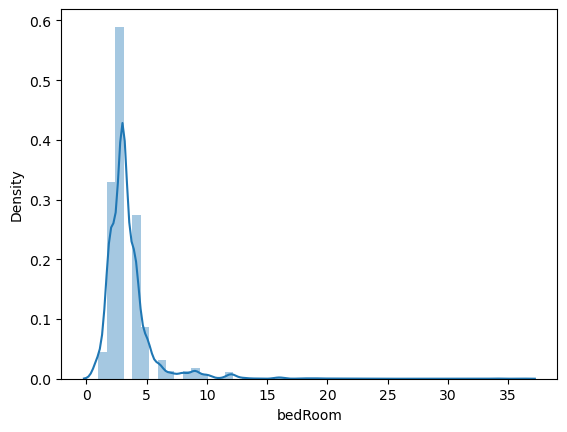

In [41]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

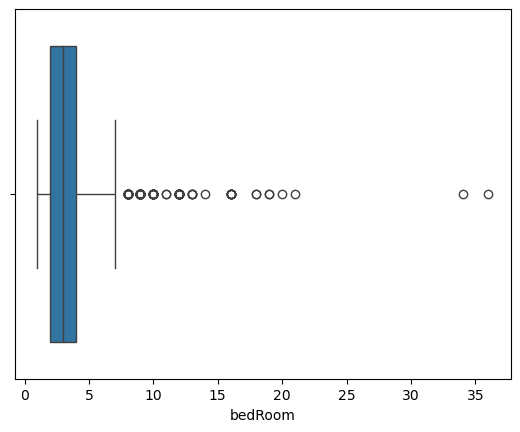

In [42]:
sns.boxplot(x=df['bedRoom'])

In [43]:
df['bedRoom'].describe()

count    3332.000000
mean        3.447179
std         2.037748
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        36.000000
Name: bedRoom, dtype: float64

In [44]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1957,independent,house,2.25,6944.0,Plot area 360(301.01 sq.m.),3240.0,36,36,2,3.0,East,Moderately Old,NaN,sector 14,NaN,3240.0,NaN,0,1,0,0,0,0,7
1969,manohar nagar,house,5.60,12444.0,Plot area 500(418.06 sq.m.)Built Up area: 500 ...,4500.0,34,34,3+,4.0,NaN,New Property,NaN,sector 10,NaN,500.0,NaN,0,0,0,0,0,2,0
3441,independent,house,5.00,43066.0,Plot area 129(107.86 sq.m.),1161.0,21,21,3+,5.0,North,Relatively New,NaN,sector 54,NaN,1161.0,NaN,0,1,0,0,0,1,49
1194,independent,house,4.50,39062.0,Plot area 128(107.02 sq.m.),1152.0,20,20,3+,4.0,East,Relatively New,NaN,sector 43,NaN,1152.0,NaN,0,1,0,0,0,1,22
2009,independent,house,3.93,24214.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,1623.0,19,17,3,4.0,North-West,Relatively New,NaN,sector 17,NaN,1622.0,NaN,1,1,1,1,0,0,74
1853,independent,house,3.87,5160.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,7500.0,19,17,3+,5.0,North-West,Relatively New,NaN,sector 17,NaN,7500.0,NaN,1,0,1,0,0,0,68
1739,independent,house,5.50,38194.0,Plot area 160(133.78 sq.m.),1440.0,18,18,3+,4.0,South-West,Relatively New,NaN,sector 54,NaN,1440.0,NaN,0,1,0,0,0,1,70
1728,private house,house,7.05,46906.0,Plot area 167(139.63 sq.m.),1503.0,18,18,3+,4.0,North-East,Relatively New,NaN,sector 55,NaN,1503.0,NaN,0,0,0,0,1,1,57
251,independent,house,12.00,38986.0,Plot area 342(285.96 sq.m.),3078.0,16,16,3+,4.0,NaN,New Property,NaN,sector 40,NaN,3078.0,NaN,1,1,1,1,0,2,0
2027,independent,house,13.50,50000.0,Plot area 300(250.84 sq.m.),2700.0,16,16,3+,4.0,North-West,Relatively New,NaN,sector 43,NaN,2700.0,NaN,1,1,0,1,1,0,41


In [45]:
df = df[df['bedRoom'] <= 10]

In [46]:
df.shape

(3285, 24)

C:\Users\SONY\AppData\Local\Temp\ipykernel_6420\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

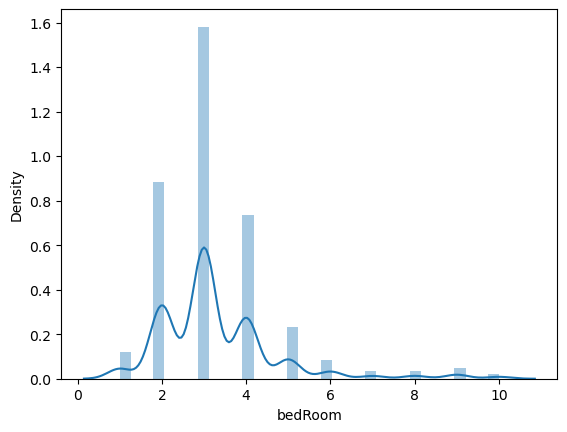

In [47]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

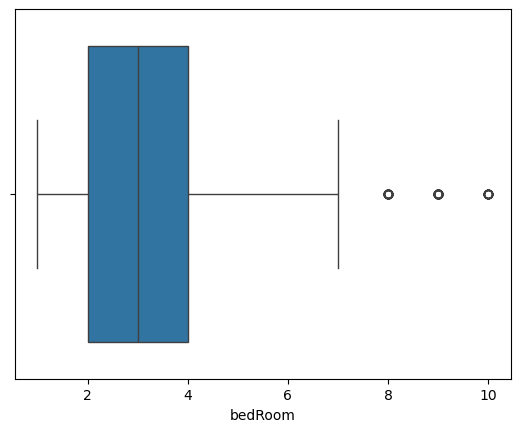

In [48]:
sns.boxplot(x=df['bedRoom'])

In [49]:
df['bedRoom'].describe()

count    3285.000000
mean        3.287976
std         1.432991
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

### Bathroom

C:\Users\SONY\AppData\Local\Temp\ipykernel_6420\2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

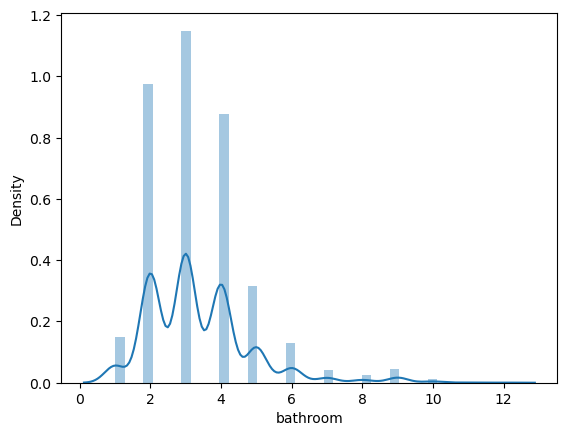

In [50]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

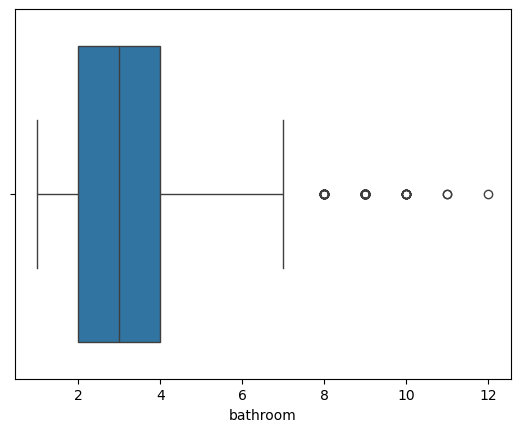

In [51]:
sns.boxplot(x=df['bathroom'])

In [52]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
654,adani brahma samsara,house,18.02,28200.0,Built Up area: 6390 (593.65 sq.m.),6390.0,9,12,3+,3.0,North-East,Relatively New,NaN,sector 60,NaN,6390.0,NaN,0,1,0,0,0,2,146
1670,independent,house,11.00,28902.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,3806.0,8,11,3+,3.0,East,Old Property,NaN,sector 24,NaN,5000.0,NaN,1,1,0,1,1,2,39
3471,independent,house,7.00,10000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,7000.0,10,11,3+,4.0,South-East,Relatively New,NaN,sector 39,NaN,7000.0,NaN,0,0,0,1,0,2,38


In [53]:
df.head()

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,emaar palm gardens,flat,1.75,9210.0,Super Built up area 1900(176.52 sq.m.)Built Up...,1900.0,3,3,3,6.0,West,Relatively New,V69525180,sector 83,1900.0,1600.0,1240.0,0,1,0,0,0,2,150
1,eros wembley estate,flat,1.40,10174.0,Super Built up area 1376(127.83 sq.m.),1376.0,3,3,2,9.0,East,Relatively New,K69325724,sector 50,1376.0,NaN,NaN,0,0,1,0,0,2,117
2,ss the leaf,flat,2.13,7574.0,Super Built up area 2812(261.24 sq.m.)Built Up...,2812.0,4,4,3,6.0,North,Relatively New,K70087544,sector 85,2812.0,2600.0,2400.0,0,0,0,0,0,0,49
3,international city by sobha phase 2,house,6.25,10035.0,Plot area 692(578.6 sq.m.),6228.0,5,7,3+,3.0,North-East,Relatively New,NaN,sector 109,NaN,6228.0,NaN,1,1,1,1,0,0,147
4,ss the coralwood,flat,1.10,4857.0,Super Built up area 1750(162.58 sq.m.),2265.0,3,3,2,9.0,North,Relatively New,H66415758,sector 84,1750.0,NaN,NaN,0,0,0,0,0,0,75


### super built up area

C:\Users\SONY\AppData\Local\Temp\ipykernel_6420\4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

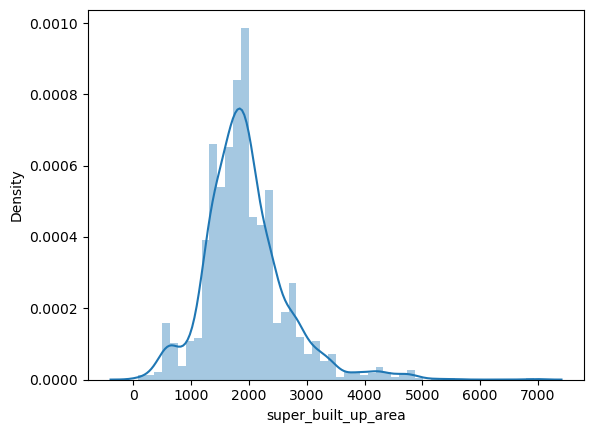

In [54]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

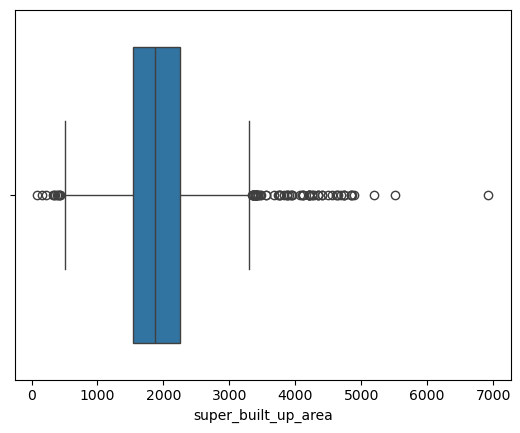

In [55]:
sns.boxplot(x=df['super_built_up_area'])

In [56]:
df['super_built_up_area'].describe()

count    1704.000000
mean     1941.223146
std       708.131349
min        89.000000
25%      1534.000000
50%      1867.500000
75%      2250.000000
max      6926.000000
Name: super_built_up_area, dtype: float64

In [57]:
df[df['super_built_up_area'] > 6000]

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3478,bestech park view grand spa,flat,4.7,6786.0,Super Built up area 6926(643.45 sq.m.),6926.0,4,4,3+,19.0,North,Relatively New,R61758448,sector 81,6926.0,NaN,NaN,0,1,0,0,0,2,140


### built up area

C:\Users\SONY\AppData\Local\Temp\ipykernel_6420\3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

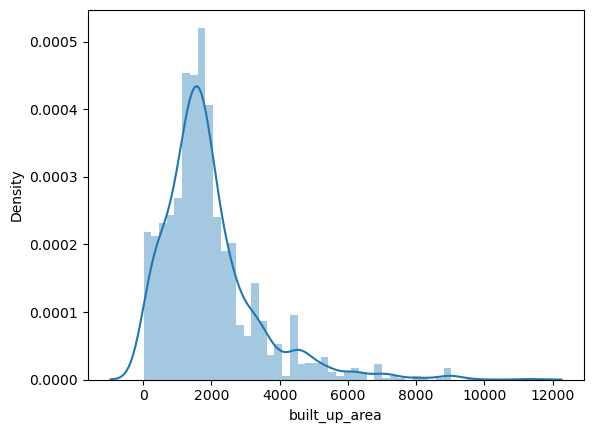

In [58]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

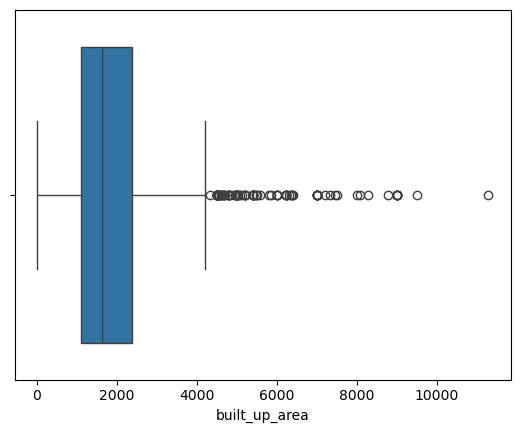

In [59]:
sns.boxplot(x=df['built_up_area'])

In [60]:
df[df['built_up_area'] > 10000]

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2658,independent,house,27.5,24366.0,Plot area 1254(1048.5 sq.m.),11286.0,6,7,3+,3.0,North-East,Relatively New,NaN,sector 43,NaN,11286.0,NaN,1,1,0,1,1,2,42


### carpet area

C:\Users\SONY\AppData\Local\Temp\ipykernel_6420\3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

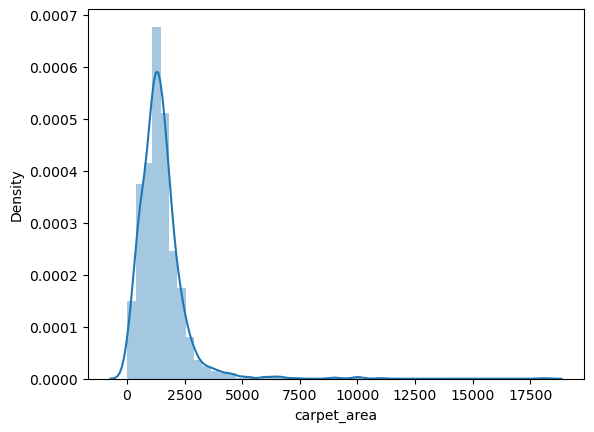

In [61]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

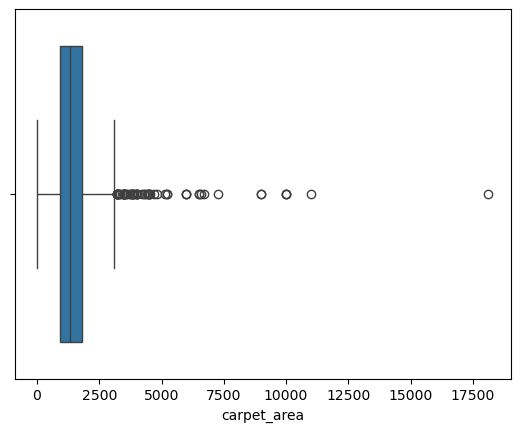

In [62]:
sns.boxplot(x=df['carpet_area'])

In [63]:
df[df['carpet_area'] > 10000]

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2231,m3m golfestate,flat,13.2,12000.0,Carpet area: 11000 (1021.93 sq.m.),11000.0,4,4,3,13.0,North,Moderately Old,T68297184,sector 65,NaN,NaN,11000.0,0,1,0,0,0,0,60
3381,godrej air,flat,2.5,1379.0,Carpet area: 18122 (1683.59 sq.m.),1812.0,4,5,3+,16.0,North-East,Under Construction,I69226618,sector 85,NaN,NaN,18122.0,1,0,0,1,1,2,44


In [64]:
df[df['carpet_area'] > 10000]

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2231,m3m golfestate,flat,13.2,12000.0,Carpet area: 11000 (1021.93 sq.m.),11000.0,4,4,3,13.0,North,Moderately Old,T68297184,sector 65,NaN,NaN,11000.0,0,1,0,0,0,0,60
3381,godrej air,flat,2.5,1379.0,Carpet area: 18122 (1683.59 sq.m.),1812.0,4,5,3+,16.0,North-East,Under Construction,I69226618,sector 85,NaN,NaN,18122.0,1,0,0,1,1,2,44


In [65]:
df.head()

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,emaar palm gardens,flat,1.75,9210.0,Super Built up area 1900(176.52 sq.m.)Built Up...,1900.0,3,3,3,6.0,West,Relatively New,V69525180,sector 83,1900.0,1600.0,1240.0,0,1,0,0,0,2,150
1,eros wembley estate,flat,1.40,10174.0,Super Built up area 1376(127.83 sq.m.),1376.0,3,3,2,9.0,East,Relatively New,K69325724,sector 50,1376.0,NaN,NaN,0,0,1,0,0,2,117
2,ss the leaf,flat,2.13,7574.0,Super Built up area 2812(261.24 sq.m.)Built Up...,2812.0,4,4,3,6.0,North,Relatively New,K70087544,sector 85,2812.0,2600.0,2400.0,0,0,0,0,0,0,49
3,international city by sobha phase 2,house,6.25,10035.0,Plot area 692(578.6 sq.m.),6228.0,5,7,3+,3.0,North-East,Relatively New,NaN,sector 109,NaN,6228.0,NaN,1,1,1,1,0,0,147
4,ss the coralwood,flat,1.10,4857.0,Super Built up area 1750(162.58 sq.m.),2265.0,3,3,2,9.0,North,Relatively New,H66415758,sector 84,1750.0,NaN,NaN,0,0,0,0,0,0,75


C:\Users\SONY\AppData\Local\Temp\ipykernel_6420\3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

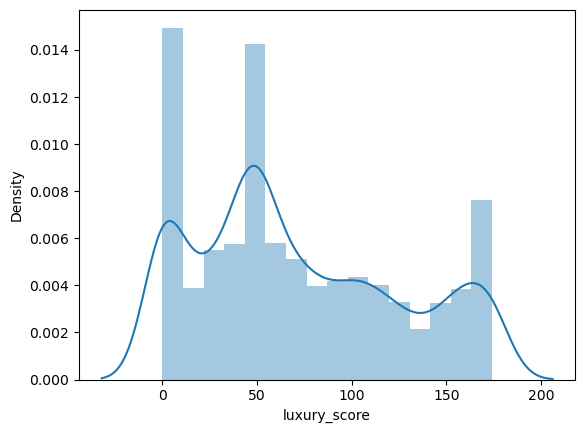

In [66]:
sns.distplot(df['luxury_score'])

<Axes: ylabel='luxury_score'>

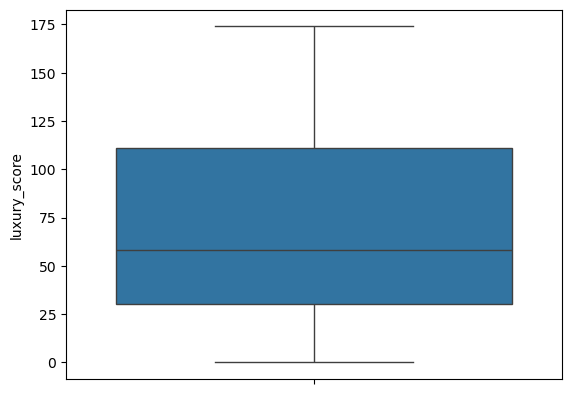

In [67]:
sns.boxplot(df['luxury_score'])

In [68]:
df.shape

(3285, 24)

In [69]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [70]:
df.head()

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,emaar palm gardens,flat,1.75,9211.0,Super Built up area 1900(176.52 sq.m.)Built Up...,1900.0,3,3,3,6.0,West,Relatively New,V69525180,sector 83,1900.0,1600.0,1240.0,0,1,0,0,0,2,150
1,eros wembley estate,flat,1.40,10174.0,Super Built up area 1376(127.83 sq.m.),1376.0,3,3,2,9.0,East,Relatively New,K69325724,sector 50,1376.0,NaN,NaN,0,0,1,0,0,2,117
2,ss the leaf,flat,2.13,7575.0,Super Built up area 2812(261.24 sq.m.)Built Up...,2812.0,4,4,3,6.0,North,Relatively New,K70087544,sector 85,2812.0,2600.0,2400.0,0,0,0,0,0,0,49
3,international city by sobha phase 2,house,6.25,10035.0,Plot area 692(578.6 sq.m.),6228.0,5,7,3+,3.0,North-East,Relatively New,NaN,sector 109,NaN,6228.0,NaN,1,1,1,1,0,0,147
4,ss the coralwood,flat,1.10,4857.0,Super Built up area 1750(162.58 sq.m.),2265.0,3,3,2,9.0,North,Relatively New,H66415758,sector 84,1750.0,NaN,NaN,0,0,0,0,0,0,75


C:\Users\SONY\AppData\Local\Temp\ipykernel_6420\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

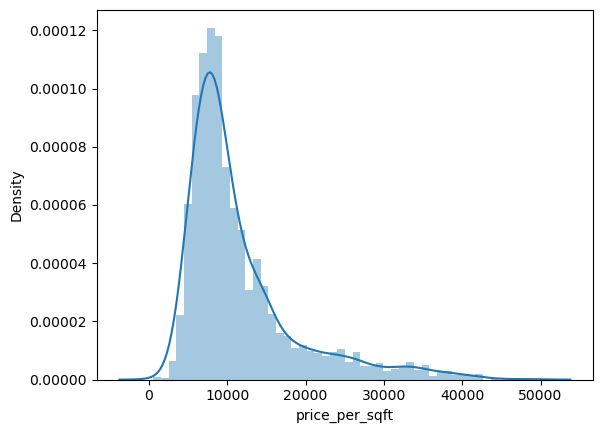

In [71]:
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

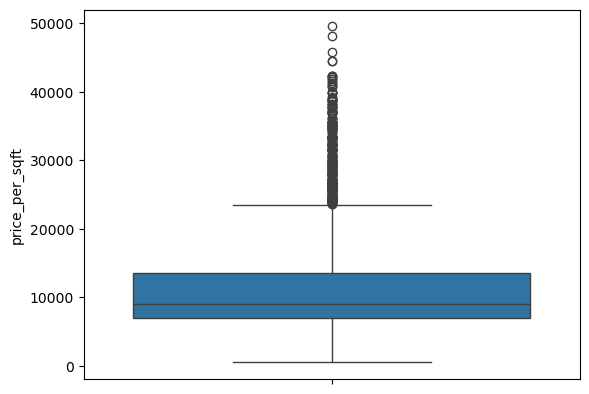

In [72]:
sns.boxplot(df['price_per_sqft'])

In [73]:
df[df['price_per_sqft'] > 42000]

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
204,dlf city plots,house,19.0,42054.0,Plot area 502(419.74 sq.m.),4518.0,6,6,3,2.0,East,Relatively New,NaN,sector 26,NaN,4518.0,NaN,1,1,0,0,0,2,121
526,sushant lok 1 builder floors,house,13.0,48148.0,Plot area 300(250.84 sq.m.),2700.0,3,3,3+,4.0,North,New Property,NaN,sector 43,NaN,2700.0,NaN,0,0,0,1,0,2,7
577,independent,house,5.0,44444.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,1125.0,9,9,3+,5.0,East,New Property,NaN,sector 55,NaN,115.0,100.0,0,0,0,0,1,2,44
1234,independent,house,13.0,45710.0,Plot area 316(264.22 sq.m.),2844.0,6,8,3+,NaN,NaN,Relatively New,NaN,sector 25,NaN,2844.0,NaN,1,1,1,1,0,1,0
1419,independent,house,9.5,42222.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,2250.0,5,5,3+,2.0,North-East,Relatively New,NaN,sector 43,NaN,300.0,250.0,0,1,0,1,0,2,88
2529,independent,house,9.9,49500.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2000.0,2,2,2,3.0,North,Undefined,NaN,sector 105,NaN,2000.0,1800.0,0,0,0,0,0,0,0
2951,independent,house,19.0,42222.0,Plot area 500(418.06 sq.m.),4500.0,6,8,3+,3.0,East,Moderately Old,NaN,sector 26,NaN,4500.0,NaN,1,1,1,1,0,2,103
3234,independent,house,20.0,44444.0,Plot area 500(418.06 sq.m.),4500.0,5,7,3+,3.0,West,Relatively New,NaN,sector 26,NaN,4500.0,NaN,0,1,0,1,0,1,97
3365,independent,house,12.0,42194.0,Plot area 316(264.22 sq.m.),2844.0,4,5,3+,4.0,East,Relatively New,NaN,sector 28,NaN,2844.0,NaN,0,1,1,1,0,2,60


In [74]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

244.5

In [75]:
df[(df['area']/df['bedRoom'])<244].sample(5)

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
498,independent,house,1.16,11717.0,Carpet area: 110 (91.97 sq.m.),990.0,5,4,2,1.0,North-East,Undefined,NaN,sector 7,NaN,NaN,110.0,0,0,0,0,0,0,0
2884,independent,house,1.10,11111.0,Built Up area: 990 (91.97 sq.m.),990.0,6,4,1,2.0,North,Undefined,NaN,sector 4,NaN,990.0,NaN,0,0,0,0,0,0,0
1387,independent,house,0.95,9500.0,Plot area 1000(92.9 sq.m.),1000.0,5,3,2,2.0,West,Relatively New,NaN,sector 37,NaN,1000.0,NaN,0,0,0,1,0,0,0
3157,shivpuri,house,2.80,12444.0,Plot area 2250(209.03 sq.m.),2250.0,10,7,3,1.0,NaN,Old Property,NaN,shivpuri,NaN,2250.0,NaN,1,1,0,1,1,2,0
789,independent,house,3.50,15556.0,Built Up area: 2250 (209.03 sq.m.),2250.0,10,1,0,1.0,NaN,New Property,NaN,sector 11,NaN,2250.0,NaN,0,0,0,0,0,0,0


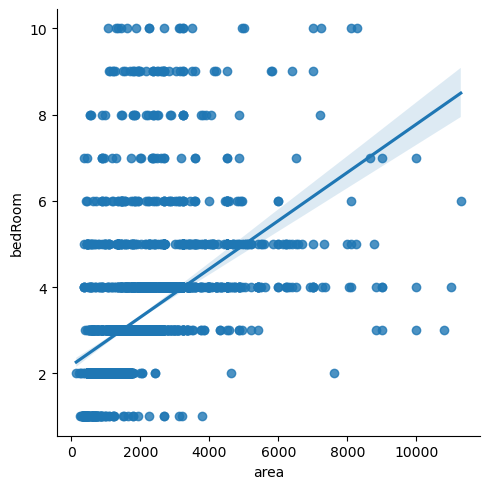

In [79]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [80]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [81]:
(df[df['area_room_ratio']< 244])['bedRoom'].value_counts()

bedRoom
3     33
5     31
2     30
4     24
6     17
9     17
8     11
7      8
10     8
Name: count, dtype: int64

In [82]:
df =df[df['area_room_ratio'] > 100]

In [83]:
outliers_df = df[(df['area_room_ratio'] < 244) & (df['bedRoom'] >3)]

In [84]:
df[(df['area_room_ratio'] < 244) & (df['bedRoom'] > 4)]

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
87,independent,house,1.25,11574.0,Plot area 120(100.34 sq.m.)Built Up area: 120 ...,1080.0,5,5,1,2.0,South,New Property,NaN,sector 6,NaN,120.0,NaN,0,0,0,1,0,0,0,216.000000
311,rattan vihar rajendra park,house,0.85,14167.0,Plot area 600(55.74 sq.m.),600.0,5,5,3+,4.0,NaN,New Property,NaN,sector 102,NaN,600.0,NaN,0,0,0,0,0,0,0,120.000000
343,independent,house,2.00,14914.0,Plot area 1341(124.58 sq.m.),1341.0,6,4,3,3.0,East,Relatively New,NaN,sector 110,NaN,1341.0,NaN,1,0,0,1,0,2,36,223.500000
368,independent,house,0.90,10000.0,Plot area 900(83.61 sq.m.),900.0,7,4,3+,4.0,NaN,Moderately Old,NaN,sector 11,NaN,900.0,NaN,0,0,0,0,0,0,7,128.571429
381,independent,house,4.35,23693.0,Plot area 204(170.57 sq.m.),1836.0,8,8,2,3.0,North-East,Relatively New,NaN,sector 46,NaN,1836.0,NaN,1,0,0,1,0,2,19,229.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,independent,house,7.60,38756.0,Plot area 215(179.77 sq.m.),1961.0,9,9,3,4.0,East,Relatively New,NaN,sector 25,NaN,1935.0,NaN,1,0,1,1,0,2,84,217.888889
3312,independent,house,2.10,23333.0,Plot area 100(83.61 sq.m.),900.0,7,7,3+,3.0,North-East,Relatively New,NaN,sector 38,NaN,900.0,NaN,1,0,1,1,0,0,27,128.571429
3374,independent,house,0.60,5128.0,Plot area 130(108.7 sq.m.),1170.0,7,3,1,2.0,North,Moderately Old,NaN,sector 104,NaN,1170.0,NaN,0,0,0,0,0,0,0,167.142857
3392,iffco nagar and 17b rwa,house,2.98,20566.0,Plot area 161(134.62 sq.m.),1449.0,6,6,3+,3.0,East,Relatively New,NaN,sector 17,NaN,1449.0,NaN,1,0,0,1,0,0,78,241.500000


In [85]:
outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])

C:\Users\SONY\AppData\Local\Temp\ipykernel_6420\3450078040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [86]:
df.update(outliers_df)

C:\Users\SONY\anaconda3\Lib\site-packages\pandas\core\dtypes\cast.py:378: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Users\SONY\AppData\Local\Temp\ipykernel_6420\3159295313.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3. 3. 4. ... 4. 4. 2.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.update(outliers_df)


In [87]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [88]:
df = df[~((df['area_room_ratio'] <244) & (df['bedRoom'] > 4))]

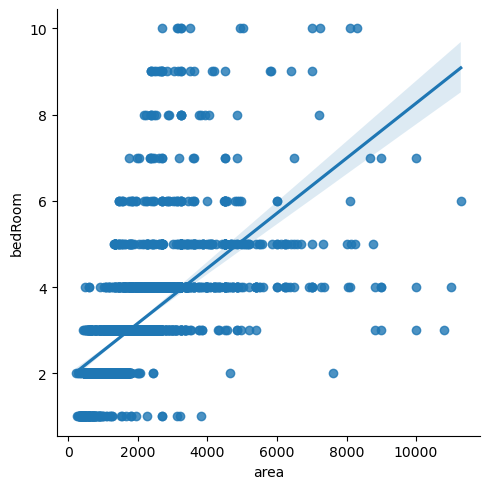

In [89]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [90]:
df.shape

(3250, 25)

In [91]:
df.to_csv('C:/Users/SONY/Machine_Learning_Project/Processed_Data/gurgaon_properties_outlier_treated.csv',index=False)